In [12]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math
import csv

In [13]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [14]:
fichero = open("1.txt", 'w')
for i in range(len(t)):
    for j in range(len(t[i])):
      fichero.write(str(t[i][j][1]) + '|1' + " ")
    fichero.write('\n')
fichero.close()

def conversor(x, y, n): ##Ingresar coordenada X, Y y el numero de nodos en cada lado (ejemplo el nodo que nos piden es de 1000x1000 es decir ingresa 1000 como 'n')
  r = x*n + y
  return r

In [ ]:
G, _ = readAdjl("1.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

In [16]:
almacenes = [] ##Arreglo de almacenes [Nombre del almacen, Nodo en el q se encuentra]
with open("Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        almacenes.append(row)  
    print(almacenes)

puntosEntrega = [] ##Arreglo de puntos de entrega [Nombre del punto, Nodo en el q se encuentra]
with open("Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        puntosEntrega.append(row)  
    print(puntosEntrega)    

[['Basil', 780755], ['Coleman', 17503], ['Red Cloud', 381488], ['Dunning', 79919], ['Susan', 816708], ['Wayridge', 684631], ['Schiller', 423738], ['Clove', 11402], ['Oneill', 324313], ['Oakridge', 722738], ['Crowley', 645660], ['Rusk', 848642], ['2nd', 442459], ['Lakewood', 305636], ['Lotheville', 225713], ['Arizona', 412081], ['Graceland', 634756], ['Elka', 94466], ['Cordelia', 578436], ['Dwight', 39525], ['Artisan', 991414], ['Prairie Rose', 444917], ['Gateway', 947611], ['Riverside', 561749], ['Elka', 405213], ['Tennyson', 16423], ['Buena Vista', 561653], ['Larry', 40559], ['Beilfuss', 104291], ['Independence', 723996], ['Declaration', 449617], ['7th', 420877], ['Dexter', 855123], ['Debs', 153476], ['Logan', 729076], ['Carey', 499795], ['Holmberg', 128357], ['Blackbird', 113953], ['Longview', 673156], ['Ridgeway', 738423], ['Macpherson', 650167], ['Mariners Cove', 917072], ['Dapin', 895137], ['Darwin', 491564], ['Fremont', 67383], ['Cardinal', 410695], ['Loeprich', 793409], ['Northp

In [39]:
 def dfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  stack = [s]

  while stack:
    u = stack.pop()
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          parent[v] = u
          stack.append(v)

  return parent

In [41]:
  def dfsPointToPoint(G, s, t):
    n = len(G)
    visited = [False]*n
    parent = [None]*n
    stack = [s]

    while stack and visited[t] == False:
      u = stack.pop()
      if not visited[u]:
        visited[u] = True
        for v in G[u]:
          if not visited[v]:
            parent[v] = u
            stack.append(v)

    return parent, parent[t]

In [42]:
  def showInfoDFS(G, source, target):
    path,_ = dfsPointToPoint(G, source, target)
    t = target
    targetPath = []
    targetPath.append(target)
    targetPath.append(path[t])
    while path[t] != source:
      t = path[t]
      targetPath.append(path[t])

    truePath = path
    for i in range(len(truePath)):
      if i not in targetPath and i != target:
        truePath[i] = None 

    return targetPath, truePath, len(targetPath)-1

In [ ]:
def crearGrafoVersion1(n):
  t = [[] for i in range(n**2)]
  for i in range(n**2):
    if i == 0:
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i in range(1,n-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i == n-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
    elif i%n == 0 and i != 0 and i != n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif (i+1)%n == 0 and i != n-1 and i != (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif i == n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i in range(n*(n-1)+1,(n**2)-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i == (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i-n])
    else:
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])

  return t

t = crearGrafoVersion1(10)
t

In [19]:
fichero = open("1.txt", 'w')
for i in range(len(t)):
    for j in range(len(t[i])):
      fichero.write(str(t[i][j][1]) + '|1' + " ")
    fichero.write('\n')
fichero.close()

In [23]:
def removeCost(G):
  re = []
  plo = []
  for i, edges in enumerate(G):
    for j in edges:
      plo.append(j[0])
    re.append(plo)
    plo = []
  return re

In [24]:
G = removeCost(G)  

In [29]:
#dpath = dfs(G, 0)
#print(dpath)
#adjlShow(G, weighted=True, path=dpath)
path1 = dfs(G,0)
print(path1)

[None, 11, 1, 13, 3, 15, 5, 17, 7, 19, 0, 21, 2, 23, 4, 25, 6, 27, 8, 29, 10, 31, 12, 33, 14, 35, 16, 37, 18, 39, 20, 41, 22, 43, 24, 45, 26, 47, 28, 49, 30, 51, 32, 53, 34, 55, 36, 57, 38, 59, 40, 61, 42, 63, 44, 65, 46, 67, 48, 69, 50, 71, 52, 73, 54, 75, 56, 77, 58, 79, 60, 81, 62, 83, 64, 85, 66, 87, 68, 89, 70, 91, 72, 93, 74, 95, 76, 97, 78, 99, 80, 90, 82, 92, 84, 94, 86, 96, 88, 98]


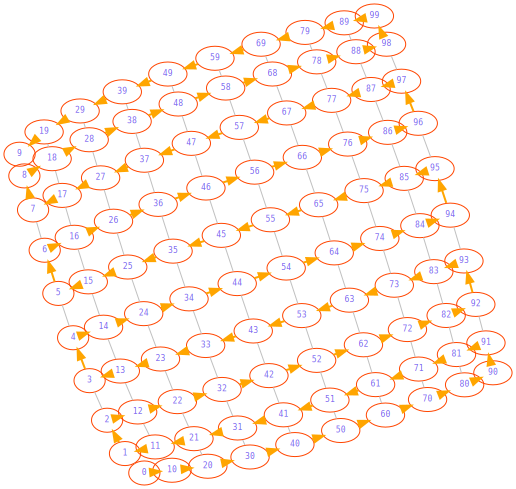

In [30]:
adjlShow(G,path = path1)

In [ ]:
path2, tPath, aristas = showInfoDFS(G, 39, 95)
print(path2)
print(aristas)
adjlShow(G,path=tPath)

**GRAFO A TRABAJAR**

In [45]:
def DFSPointToPointEdges(G, source, target):
  path,_ = dfsPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])
  return len(targetPath)-1

In [ ]:
almacenes2 = [] ##Arreglo de almacenes [Nombre del almacen, posicion X, posicion Y]
with open("Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        almacenes2.append(row)  
    print(almacenes2)
    
puntosEntrega2 = [] ##Arreglo de puntos de entrega [Nombre del punto, posicion X, posicion Y]
with open("Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        puntosEntrega2.append(row)  
    print(puntosEntrega2)

In [47]:
def dist(a,b):
  _, x1, y1 = a
  _, x2, y2 = b
  return abs(int(x1) - int(x2)) + abs(int(y1) - int(y2))

group = [-1] * len(puntosEntrega2)

for i in range(len(puntosEntrega2)):
  m = 0
  d = dist(puntosEntrega2[i], puntosEntrega2[len(puntosEntrega2)-1])
  for j in range(len(almacenes2)):
    d2 = dist(puntosEntrega2[i], almacenes2[j])
    if d2 < d:
      d = d2
      m = j
  group[i] = m

In [52]:
group = np.array(group)

cant = []
for i in range(len(almacenes)):
  cant.append(len(group[group == i]))

print(min(cant))
print(max(cant))
print(np.mean(cant))

2
185
60.0


In [54]:
GR, _ = readAdjl("Archivos/grafo-complejidad.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
##for i, edges in enumerate(G):
  ##print(f"{i:2}: {edges}")
##adjlShow(G, weighted=True)

In [55]:
G2 = removeCost(GR)

### **GRUPOS TRABAJADOS (41 - 50)**

In [59]:
#GRUPO 41
group[group == 41]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 41: 
    camino = DFSPointToPointEdges(G2, almacenes[41][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[65928, 41819, 22008, 55811, 47, 23871, 12005, 22028, 35845, 55824, 39837, 16011, 57856, 40038, 53935, 61887, 32001, 13806, 9895, 52036, 64020, 69942, 21827, 10018, 7881, 46020, 11931, 37976, 45992, 17860, 37857, 5945, 13968]


In [60]:
#GRUPO 42
group[group == 42]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 42: 
    camino = DFSPointToPointEdges(G2, almacenes[42][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[13944, 14014, 111840, 65887, 129794, 9944, 101792, 97843, 17953, 79959, 16010, 9804, 5977, 111864, 12000, 87859, 77989, 37869, 82015, 7971, 87846, 164002, 59800, 69814, 119857, 13785, 33830, 163810, 37930, 8026, 101949, 74016, 93995, 123842, 9935, 41937, 61990, 23985, 9946, 26024, 23793, 140021, 105794, 15858, 1840, 99839, 129770, 127810, 42010, 63947, 37776, 3968, 123803]


In [61]:
#GRUPO 43
group[group == 43]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 43: 
    camino = DFSPointToPointEdges(G2, almacenes[43][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[12918, 8975, 28001, 13041, 6922, 55982, 21039, 27062, 4929, 11942, 1932, 21959, 70998, 43994, 14037, 25920, 77000, 1913, 2016, 30940, 39985, 34950, 60975, 52989, 55982, 5017, 43993, 46983, 5093, 37975, 17955, 23983, 30984, 11961, 6024, 30998, 21945, 19016, 52972, 37992, 9058, 41003, 21954, 7987, 23034, 23985, 13039, 36978, 9992]


In [62]:
#GRUPO 44
group[group == 44]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 44: 
    camino = DFSPointToPointEdges(G2, almacenes[44][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[34134, 3981, 40032, 18139, 7998, 15978, 32004, 48112, 2110, 8116, 10018, 18008, 41987, 16140, 6155, 42013, 6114, 48132, 53995, 29994, 19986, 31988, 3987, 24003, 22150, 24020, 10164, 6009, 50001]


In [63]:
#GRUPO 45
group[group == 45]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 45: 
    camino = DFSPointToPointEdges(G2, almacenes[45][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[6006, 10061, 36798, 6787, 41997, 6872, 19947, 44025, 12059, 10788, 20761, 44821, 26816, 6808, 14760, 12844, 22849, 26782, 15993, 24032, 12758]


In [64]:
#GRUPO 46
group[group == 46]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 46: 
    camino = DFSPointToPointEdges(G2, almacenes[46][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[103924, 15658, 131593, 67907, 59651, 85938, 43984, 1944, 77601, 141573, 15958, 149609, 99632, 63614, 105931, 61594, 7971, 18018, 135994, 73585, 37665, 73923, 27997, 157564, 49919, 37681, 153590, 106024, 47987, 1639, 15588, 57599, 93636, 60016, 136007, 5629, 3642, 137565, 73974, 47649, 144020, 44017, 73958, 124034, 83688, 129569, 93591, 133592, 30015, 3933, 63952, 85636, 83952, 69619, 152020, 105562, 71909, 15598, 13913, 19989, 11573, 97603, 49608, 15615, 68023, 17658, 9907, 101601, 55647, 7959, 96010, 51577, 19573, 134010, 65648, 73637, 107995, 98028, 35608, 111996, 55980, 25970, 9987, 47952, 55946]


In [65]:
#GRUPO 47
group[group == 47]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 47: 
    camino = DFSPointToPointEdges(G2, almacenes[47][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[2003, 74265, 68025, 108037, 116300, 56005, 1951, 29961, 98310, 6301, 132252, 40282, 14020, 17989, 15988, 34329, 14272, 13947, 5957, 93968, 88300, 16288, 112000, 90011, 8263, 11995, 8263, 108279, 120262, 24012]


In [66]:
#GRUPO 48
group[group == 48]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 48: 
    camino = DFSPointToPointEdges(G2, almacenes[48][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[33836, 5913, 19900, 27790, 44036, 19954, 49824, 31894, 141953, 87752, 139944, 17958, 5893, 13950, 15929, 101823, 5689, 81771, 31772, 32045, 19912, 9695, 15785, 29804, 39813, 53997, 83760, 48051, 31762, 71914, 26010, 125934, 137984, 23700, 25997, 53885, 7699, 40084, 75942, 3880, 4018, 83866, 109981, 22058, 111878, 39722, 57793, 134004, 7848, 41886, 19984, 81866, 99773, 29955, 4083, 111920, 123796, 3904, 35816, 68046, 15676, 121916, 3702, 93997, 75787, 53844, 100006, 53800, 43909, 9894, 27702, 13890, 105831, 125987, 53936, 31771, 25812, 35982, 13910, 11999, 140001, 35907, 45744, 23946, 72006, 99981, 14093, 136004, 145795, 29699, 113961, 11883, 37875, 85777, 6093, 115905, 127798, 1938, 123943, 23801, 35782, 7774, 39943, 123871, 83930]


In [67]:
#GRUPO 49
group[group == 49]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 49: 
    camino = DFSPointToPointEdges(G2, almacenes[49][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[72956, 12042, 1910, 61922, 26980, 31914, 52999, 31910, 9933, 123979, 94984, 50980, 28962, 116996, 10999, 69015, 39964, 23960, 46991, 122967, 97984, 6932, 48971, 131976, 7980, 12, 43951, 91958, 42937, 4027, 104975, 14941, 41963, 69927, 52926, 41974, 1937, 63974, 14987, 17984, 60998, 88934, 19972, 937, 54994, 8937, 5909, 131974, 98997, 101015, 43955, 90974, 50945, 126935, 47927, 77978, 48998, 5982, 93983, 77974, 125972, 16982, 31928, 70932, 25019, 28916, 50990, 131957, 121946, 21974, 24897]


In [68]:
#GRUPO 50
group[group == 50]
distancias_almacen_punto_entrega_DFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 50: 
    camino = DFSPointToPointEdges(G2, almacenes[50][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_DFS.append(camino)
print(distancias_almacen_punto_entrega_DFS)

[]
